# Digit Recognizer

The goal of this notebook is to identify digits.

The dataset is from sklearn.datasets. <br />
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import scipy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
digits_data = load_digits()

In [3]:
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

## Data visualization

Let's visualize some digits.

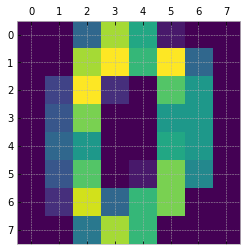

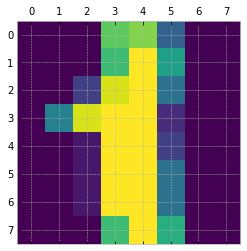

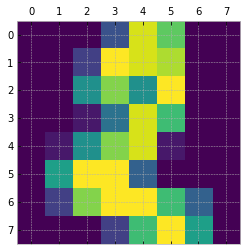

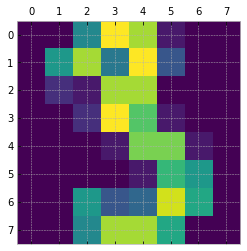

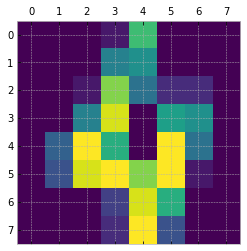

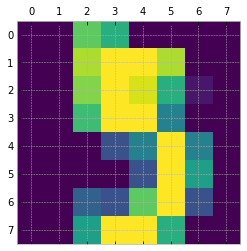

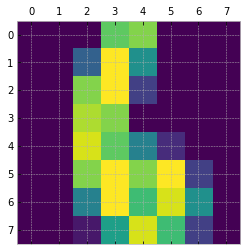

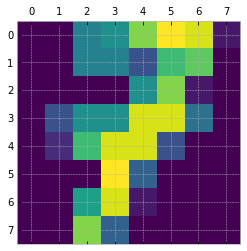

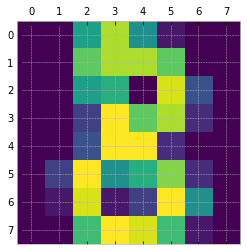

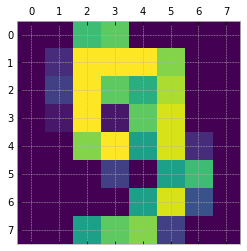

In [4]:
for i in range(10):
    plt.matshow(digits_data.images[i])

## Data preprocessing

In [5]:
digits_data.data.shape

(1797, 64)

The dimensionality of this dataset is 64. Visualizing relationships in this high dimension is really difficult so  I will use a dimensionality reduction technique to reduce the data to 2 dimensions.

In [6]:
iso = Isomap(n_components=2)
reduced = iso.fit_transform(digits_data.data)
print(digits_data.data.shape)
print(reduced.shape)

(1797, 64)
(1797, 2)


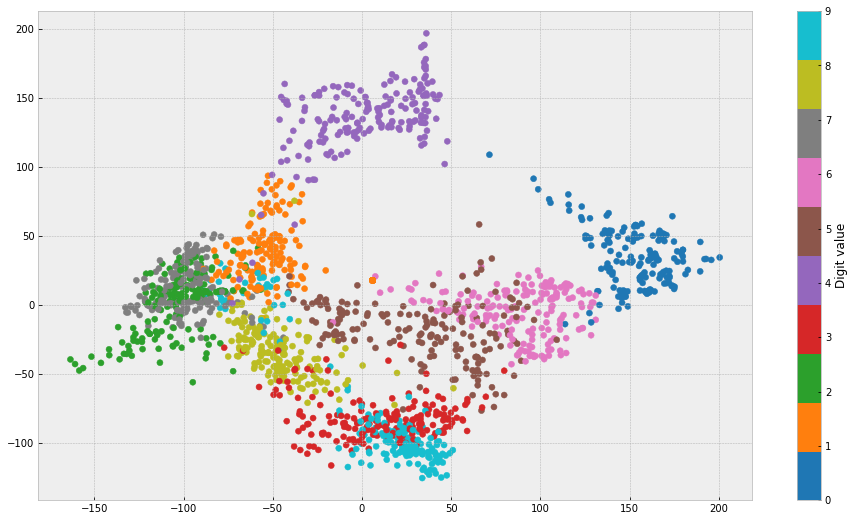

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(reduced[:, 0], reduced[:, 1], c=digits_data.target, cmap="tab10")
plt.colorbar(ticks=range(10), label='Digit value')
plt.show()

It's possible to see that 9 and 3 are very difficult to distinguish, because they overlap in the graph. However, 3 and 4 are very distant, meaning they are much less likely to be confused.

## Model building

Although this dataset has a target array, I will ignore that. <br />
Because I see in the graph groups of points I will try to use k-means algorithm to discover them.

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0)  # n_clusters=10 because we have 10 different digits
kmeans.fit_predict(digits_data.data)

array([5, 9, 9, ..., 9, 4, 4])

In [9]:
accuracy_score(digits_data.target, kmeans.labels_)

0.006121313299944352

In [10]:
def find_permutation(n_clusters, real_labels, labels):
    per = []
    for n in range(n_clusters):
        idx = labels == n
        new_label = scipy.stats.mode(real_labels[idx])[0][0]
        per.append(new_label)
    return per

In [11]:
permutation = find_permutation(10, digits_data.target, kmeans.labels_)
permutation

[4, 3, 1, 2, 9, 0, 7, 6, 5, 8]

In [12]:
new_labels = [permutation[label] for label in kmeans.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(digits_data.target, new_labels))

Accuracy score is 0.7952142459654981


In [13]:
print(classification_report(digits_data.target, new_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.84      0.84      0.84       177
           3       0.86      0.85      0.85       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.59      0.51       174
           9       0.57      0.77      0.66       180

    accuracy                           0.80      1797
   macro avg       0.80      0.80      0.79      1797
weighted avg       0.81      0.80      0.79      1797



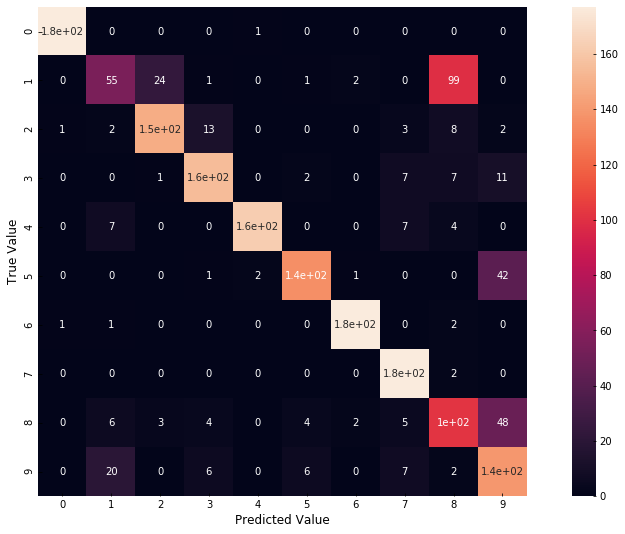

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
mat = confusion_matrix(digits_data.target, new_labels)
sns.heatmap(mat, square=True, annot=True, xticklabels=digits_data.target_names, yticklabels=digits_data.target_names)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

The bigger confusions are between 8-1 and 9-8, which is comprehensible, because they are similar digits.

# References:
* https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* https://saskeli.github.io/data-analysis-with-python-summer-2019/clustering.html